## 1. Average ,Minimum,Maximum Rating

In [2]:
import pandas as pd 
import numpy as np 
import re 

In [3]:
df = pd.read_csv("Eazydiner_final_data.csv")
df

,Restaurants,address,city,ratings,prices,cuisines,Meal_Type,Restaurant_offer_percentage,Online_payment_offer_percentage
0,Daryaganj - By The Inventors Of Butter Chicken...,"DLF Mall of India, Sector 18, Noida",Noida,4.3,1800,North Indian,Lunch,25,0
1,PLATE,"DLF Promenade Mall, Vasant Kunj",Vasant Kunj,4.5,2500,Multicuisine,Lunch,25,0
2,Zing,"The Metropolitan Hotel & Spa, New Delhi",Delhi,1.0,3500,Multicuisine,Lunch,25,25
3,Fifty9,"Radisson Blu Marina, New Delhi",Delhi,4.4,2500,Multicuisine,Lunch,35,25
4,Hard Rock Cafe,"Connaught Place (CP), Central Delhi",Delhi,4.0,1500,Multicuisine,Lunch,35,25
...,...,...,...,...,...,...,...,...,...
5687,Narrative,"Mundhwa, Pune",Pune,3.0,1200,Multicuisine,Breakfast,10,25
5688,Saundarya Garden,"Hinjawadi, Pune",Pune,3.1,1000,"Indian, Multicuisine",Breakfast,15,25
5689,Beer & Beans,"Baner, Pune",Pune,5.0,1400,Continental,Breakfast,10,25
5690,Escada - All Day Kitchen & Bar,"Viman Nagar, Pune",Pune,3.8,1300,Multicuisine,Breakfast,20,25


In [19]:
df['ratings'].mean()

np.float64(4.170279002245314)

In [20]:
df['ratings'].min()

1.0

In [21]:
df['ratings'].max()

5.0

## 2. Top 10 Restaurants with highest ratings

In [22]:
top_restaurants = df.sort_values('ratings', ascending=False)

top_restaurants[['Restaurants', 'ratings']].head(10)


,Restaurants,ratings
1973,B Takshila,5.0
1223,Kasso,5.0
1239,Cafe Amaris,5.0
1238,Morni House Cafe And Terrace,5.0
1237,Dawn2Dusk Café,5.0
2154,Mongabay,5.0
2155,Blanca,5.0
1226,Atmos29 RestoBar & Club,5.0
545,Rasayyah,5.0
2157,The Palette Cafe,5.0


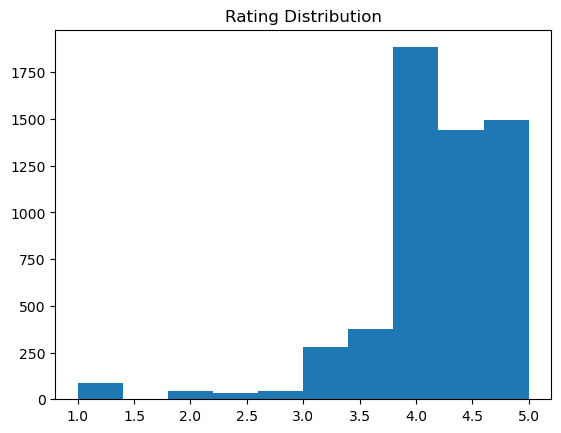

In [23]:
plt.hist(df['ratings'])
plt.title('Rating Distribution')
plt.show()


## 3.restaurants above 4.0 ratings

In [24]:
df[df['ratings'] > 4.0].shape[0]


3142

## 4. Restaurants distrubuted across price ranges 

In [25]:
bins = [0, 1000, 2000, 4000, df['prices'].max()]
labels = ['Low', 'Medium', 'High', 'Premium']

df['price_range'] = pd.cut(df['prices'], bins=bins, labels=labels)


In [26]:
price_distribution = (
    df['price_range']
    .value_counts()
    .reset_index()
)

price_distribution.columns = ['price_range', 'restaurant_count']
price_distribution


,price_range,restaurant_count
0,Medium,2786
1,Low,2233
2,High,614
3,Premium,59


In [27]:
price_distribution['percentage'] = (
    price_distribution['restaurant_count'] /
    price_distribution['restaurant_count'].sum()
) * 100

price_distribution


,price_range,restaurant_count,percentage
0,Medium,2786,48.945889
1,Low,2233,39.230499
2,High,614,10.787070
3,Premium,59,1.036543


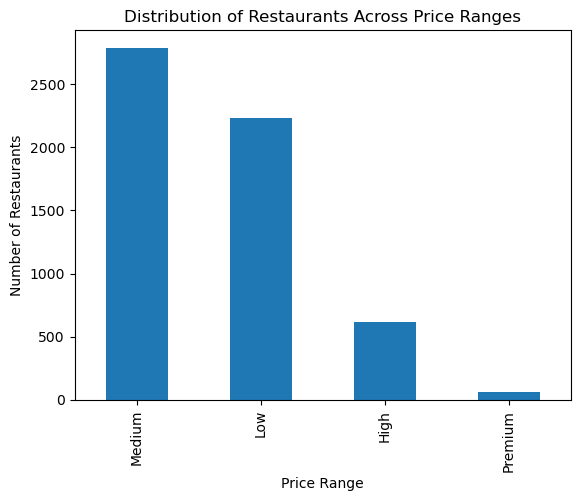

In [28]:
import matplotlib.pyplot as plt

price_distribution.plot(
    x='price_range',
    y='restaurant_count',
    kind='bar',
    legend=False 
)

plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants Across Price Ranges')
plt.show()


## 5. Correlation between prices and ratings 

In [29]:
correlation = df['prices'].corr(df['ratings'])
correlation

np.float64(0.05721395317309327)

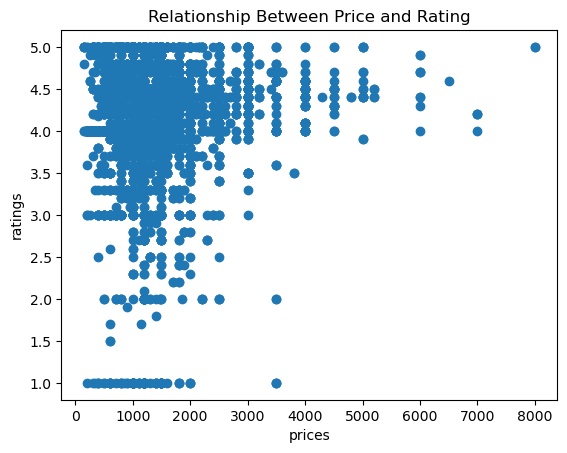

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df['prices'], df['ratings'])
plt.xlabel('prices')
plt.ylabel('ratings')
plt.title('Relationship Between Price and Rating')
plt.show()


## 6. Do higher-priced restaurants receive better ratings?

In [69]:
bins = [0, 1000, 2000, 4000, df['prices'].max()]
labels = ['Low', 'Medium', 'High', 'Premium']

df['price_range'] = pd.cut(df['prices'], bins=bins, labels=labels)


In [70]:
price_vs_rating = (
    df.groupby('price_range')['ratings']
    .mean()
    .reset_index()
)

price_vs_rating


/var/folders/3f/r9z314m942lbt_bw9rr5v4sr0000gn/T/ipykernel_1307/1453106713.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_range')['ratings']


,price_range,ratings
0,Low,4.188794
1,Medium,4.128016
2,High,4.264658
3,Premium,4.483051


## 7. Which city has the highest number of restaurants?

In [71]:
city_counts = df['city'].value_counts()
city_counts


city
Pune           1589
Mumbai         1311
Delhi          1140
Gurgaon         685
Noida           437
Thane           257
Faridabad        92
Parel            72
Vasant Kunj      40
Vashi            39
Saket            30
Name: count, dtype: int64

In [34]:
top_city = city_counts.idxmax()
top_count = city_counts.max()

top_city, top_count


('Pune', 1589)

## 8.Average rating per city 

In [35]:
average_rating_city = df.groupby('city')['ratings'].mean().reset_index()

In [36]:
average_rating_city

,city,ratings
0,Delhi,4.122193
1,Faridabad,4.061957
2,Gurgaon,4.301898
3,Mumbai,4.234096
4,Noida,4.079634
5,Parel,4.386111
6,Pune,4.120045
7,Saket,4.163333
8,Thane,4.174226
9,Vasant Kunj,4.227500


## 9.Average prices per city 

In [37]:
average_price_per_city = df.groupby('city')['prices'].mean().reset_index()
average_price_per_city

,city,prices
0,Delhi,1505.743860
1,Faridabad,1317.934783
2,Gurgaon,1406.423358
3,Mumbai,1465.884058
4,Noida,1401.709382
5,Parel,1309.027778
6,Pune,1267.016992
7,Saket,1440.000000
8,Thane,1073.540856
9,Vasant Kunj,1417.500000


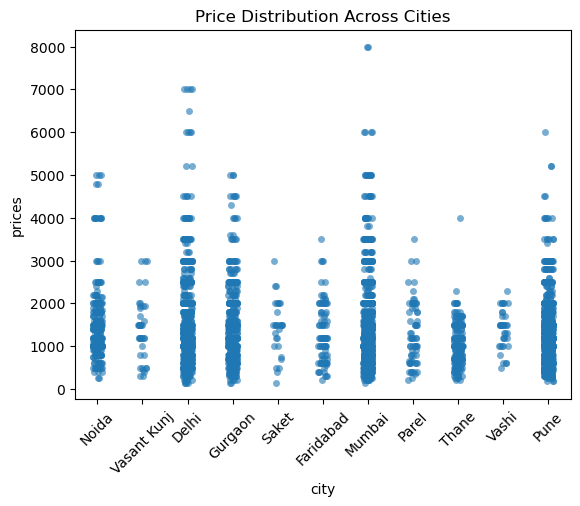

In [38]:
import seaborn as sns

# plt.figure(figsize=(12,5))
sns.stripplot(x='city', y='prices', data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Cities')
plt.show()


In [39]:
df.dtypes

Restaurants                          object
address                              object
city                                 object
ratings                             float64
prices                                int64
cuisines                             object
Meal_Type                            object
Restaurant_offer_percentage           int64
Online_payment_offer_percentage       int64
price_range                        category
dtype: object

## 10. What are the most popular cuisines?

In [40]:
Most_popular_cuisines = df['cuisines'].value_counts()
Most_popular_cuisines

cuisines
Multicuisine                      2604
Indian                             195
North Indian                       168
Cafe                               146
Cocktail Menu, Multicuisine        136
                                  ... 
Sandwiches, Beverages                1
Thai, Asian                          1
Maharashtrian, Regional Indian       1
Street Food, Cafe                    1
Cafe, Desserts                       1
Name: count, Length: 454, dtype: int64

In [41]:
Most_popular_cuisines.idxmax()

'Multicuisine'

## 11.Which cuisine has the highest average rating?

In [42]:
cuisine_with_highest_rating = (df.groupby('cuisines')['ratings'].mean().reset_index().sort_values(by = 'ratings',ascending = False))
cuisine_with_highest_rating.head(10)

,cuisines,ratings
65,"British, Continental",5.0
59,"Beverages, South Indian",5.0
177,"European, Coffee",5.0
183,"European, Indian, Mexican",5.0
345,"Mexican, Tex-Mex",5.0
344,"Mexican, Pan Asian",5.0
243,"Indian, American",5.0
325,"Lucknowi, North Indian, Mughlai",5.0
47,"Beverages, Desserts",5.0
324,"Lucknowi, Indian, Awadhi, Mughlai",5.0


## 12.Which cuisines are generally more expensive?

In [43]:
Expensive_cuisines = df.groupby('cuisines')['prices'].mean().reset_index().sort_values(by = 'prices' ,ascending = False)
Expensive_cuisines

,cuisines,prices
23,"Awadhi, Indian",5750.0
100,"Chinese, Japanese",4500.0
262,"Indian, North West Frontier",4250.0
48,"Beverages, Desserts, Mughlai, Modern Indian, N...",4000.0
412,"Progressive Indian Cuisine, North Indian",4000.0
...,...,...
202,"Fast Food, Goan",250.0
419,"Sandwiches, Burgers",200.0
394,Paan,200.0
434,"South Indian, Street Food",200.0


In [44]:
top_cuisines = Expensive_cuisines.head(10)
top_cuisines

,cuisines,prices
23,"Awadhi, Indian",5750.000000
100,"Chinese, Japanese",4500.000000
262,"Indian, North West Frontier",4250.000000
48,"Beverages, Desserts, Mughlai, Modern Indian, N...",4000.000000
412,"Progressive Indian Cuisine, North Indian",4000.000000
167,"Desserts, Italian",4000.000000
22,Awadhi,3800.000000
415,Regional Indian,3633.333333
336,"Mediterranean, Middle Eastern",3600.000000
435,"Spanish, Seafood, European, French, Italian",3500.000000


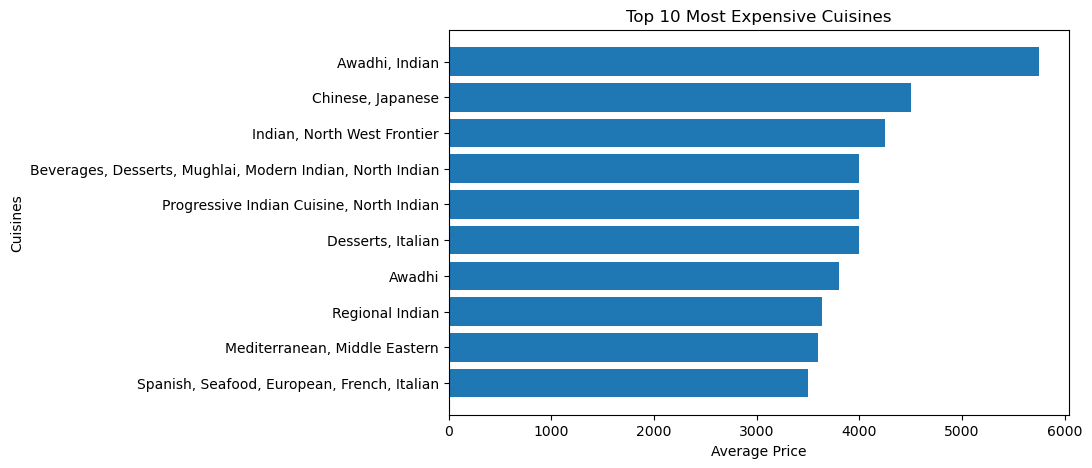

In [45]:
plt.figure(figsize=(8,5))
plt.barh(top_cuisines['cuisines'],top_cuisines['prices'])
plt.xlabel('Average Price')
plt.ylabel('Cuisines')
plt.title('Top 10 Most Expensive Cuisines')
plt.gca().invert_yaxis()
plt.show()


## 13.Do higher-priced restaurants offer bigger discounts?

In [46]:
df_offer = df[df['Restaurant_offer_percentage'] > 0]


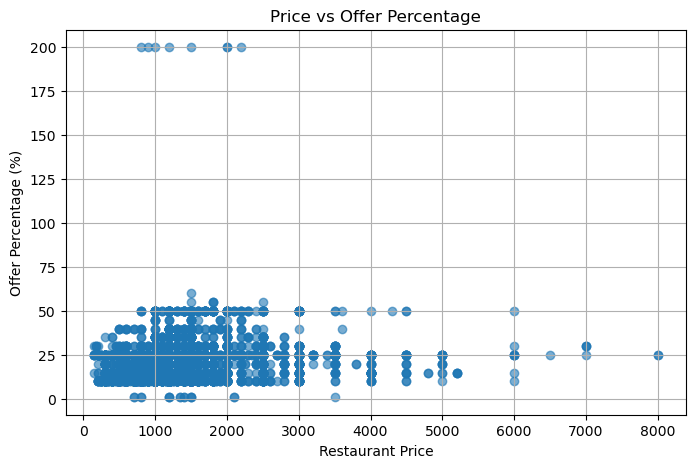

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df_offer['prices'], df_offer['Restaurant_offer_percentage'], alpha=0.6)
plt.xlabel('Restaurant Price')
plt.ylabel('Offer Percentage (%)')
plt.title('Price vs Offer Percentage')
plt.grid(True)
plt.show()


## 14.Which meal type has the highest number of restaurants?

In [48]:
number_of_restaurant_by_meal = df['Meal_Type'].value_counts()
number_of_restaurant_by_meal_df = number_of_restaurant_by_meal.reset_index()
number_of_restaurant_by_meal_df.columns = ['Meal_Type','restaurant_count']

In [49]:
number_of_restaurant_by_meal_df

,Meal_Type,restaurant_count
0,Lunch,2157
1,Dinner,1788
2,Breakfast,1287
3,Fast_Food,460


## 15.Are premium locations associated with premium pricing?

In [61]:
premium_cities = ['Mumbai', 'Delhi', 'Pune']
df['premium_location'] = df['city'].isin(premium_cities)


In [62]:
price_comparison = (
    df.groupby('premium_location')['prices']
      .agg(['mean', 'median', 'count'])
      .reset_index()
)

price_comparison


,premium_location,mean,median,count
0,False,1344.943705,1200.0,1652
1,True,1398.913861,1200.0,4040


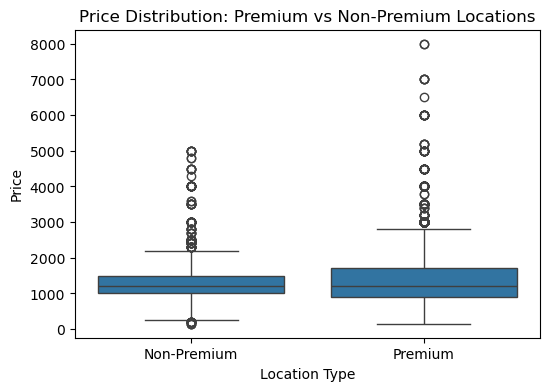

In [63]:

plt.figure(figsize=(6,4))
sns.boxplot(x='premium_location', y='prices', data=df)
plt.xticks([0,1], ['Non-Premium', 'Premium'])
plt.xlabel('Location Type')
plt.ylabel('Price')
plt.title('Price Distribution: Premium vs Non-Premium Locations')
plt.show()


## 16. Which restaurants provide the best value for money (high rating + low price)?

In [53]:
avg_rating = df['ratings'].mean()
avg_price = df['prices'].mean()


In [54]:
best_value_restaurants = df[
    (df['ratings'] >= avg_rating) &
    (df['prices'] <= avg_price)
].sort_values(
    by=['ratings', 'prices'],
    ascending=[False, True]
)

best_value_restaurants.head(10)


,Restaurants,address,city,ratings,prices,cuisines,Meal_Type,Restaurant_offer_percentage,Online_payment_offer_percentage,price_range,premium_location
1809,Samosa Party,"Udyog Vihar, Gurgaon",Gurgaon,5.0,150,Street Food,Fast_Food,25,0,NaN,False
1813,Licksters,"Sector 10, Dwarka, West Delhi",Delhi,5.0,150,Ice Cream,Fast_Food,25,0,NaN,True
2381,Samosa Party,"Udyog Vihar, Gurgaon",Gurgaon,5.0,150,Street Food,Breakfast,25,0,NaN,False
2383,Licksters,"Sector 10, Dwarka, West Delhi",Delhi,5.0,150,Ice Cream,Breakfast,25,0,NaN,True
3440,Gaurav Fruits Gallery Cafe,"Mulund West, Central Mumbai",Mumbai,5.0,150,Healthy,Dinner,15,25,NaN,True
1688,Krispy Kreme,"Ambience Mall, Gurgaon",Gurgaon,5.0,200,Desserts,Fast_Food,25,25,NaN,False
3611,Scoop Gelateria Premium Italian Icecream,"Bhandup West, Mumbai",Mumbai,5.0,200,Ice Cream,Fast_Food,10,25,NaN,True
1742,Go Fro - Frozen Yogurt & More,"Greater Kailash (GK) 2, South Delhi",Delhi,5.0,300,Desserts,Fast_Food,10,25,NaN,True
1811,The Basement Restaurant & Café,"DLF Phase 3, Gurgaon",Gurgaon,5.0,300,"Chinese, Indian",Fast_Food,25,0,NaN,False
2756,Sandwizzaa,"Chembur, Central Mumbai",Mumbai,5.0,300,Fast Food,Lunch,15,25,NaN,True


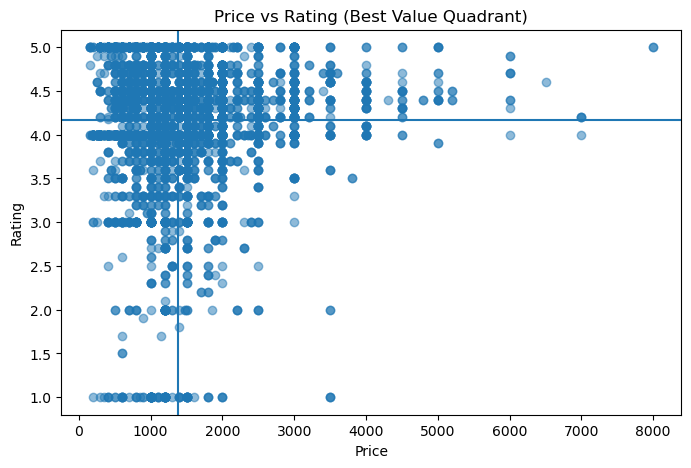

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['prices'], df['ratings'], alpha=0.5)

# Reference lines
plt.axhline(avg_rating)
plt.axvline(avg_price)

plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating (Best Value Quadrant)')
plt.show()


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692 entries, 0 to 5691
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Restaurants                      5692 non-null   object  
 1   address                          5692 non-null   object  
 2   city                             5692 non-null   object  
 3   ratings                          5692 non-null   float64 
 4   prices                           5692 non-null   int64   
 5   cuisines                         5692 non-null   object  
 6   Meal_Type                        5692 non-null   object  
 7   Restaurant_offer_percentage      5692 non-null   int64   
 8   Online_payment_offer_percentage  5692 non-null   int64   
 9   price_range                      5174 non-null   category
 10  premium_location                 5692 non-null   bool    
dtypes: bool(1), category(1), float64(1), int64(3), object(5)
memory usage

In [57]:
df.describe()

,ratings,prices,Restaurant_offer_percentage,Online_payment_offer_percentage
count,5692.000000,5692.000000,5692.000000,5692.000000
mean,4.170279,1383.250000,20.765460,21.981202
std,0.676329,797.683454,11.921755,8.142284
min,1.000000,150.000000,0.000000,0.000000
25%,4.000000,900.000000,10.000000,25.000000
50%,4.200000,1200.000000,20.000000,25.000000
75%,4.600000,1600.000000,25.000000,25.000000
max,5.000000,8000.000000,200.000000,25.000000


In [58]:
restaurants_both = (
    df.groupby('Restaurants')['Meal_Type']
      .apply(lambda x: {'Lunch', 'Dinner',}.issubset(set(x)))
)

count_both = restaurants_both.sum()
count_both


np.int64(1482)

In [59]:
df.head(10)

,Restaurants,address,city,ratings,prices,cuisines,Meal_Type,Restaurant_offer_percentage,Online_payment_offer_percentage,price_range,premium_location
0,Daryaganj - By The Inventors Of Butter Chicken...,"DLF Mall of India, Sector 18, Noida",Noida,4.3,1800,North Indian,Lunch,25,0,Medium,False
1,PLATE,"DLF Promenade Mall, Vasant Kunj",Vasant Kunj,4.5,2500,Multicuisine,Lunch,25,0,High,False
2,Zing,"The Metropolitan Hotel & Spa, New Delhi",Delhi,1.0,3500,Multicuisine,Lunch,25,25,High,True
3,Fifty9,"Radisson Blu Marina, New Delhi",Delhi,4.4,2500,Multicuisine,Lunch,35,25,High,True
4,Hard Rock Cafe,"Connaught Place (CP), Central Delhi",Delhi,4.0,1500,Multicuisine,Lunch,35,25,Medium,True
5,Sakura,"The Metropolitan Hotel & Spa, New Delhi",Delhi,4.0,4500,"Japanese, Sushi",Lunch,25,25,Premium,True
6,"Chutney, Bar + Tandoor","The Metropolitan Hotel & Spa, New Delhi",Delhi,3.5,3000,Indian,Lunch,25,25,High,True
7,Desi Villagio,"Connaught Place (CP), Central Delhi",Delhi,4.1,1300,Indian,Lunch,35,25,Medium,True
8,"MIST, THE Park New Delhi","The Park, New Delhi",Delhi,4.0,2500,Multicuisine,Lunch,35,25,High,True
9,Vega,"Hotel Alka Classic, New Delhi",Delhi,4.2,1700,North Indian,Lunch,30,25,Medium,True


In [72]:
df.isna().sum()

Restaurants                        0
address                            0
city                               0
ratings                            0
prices                             0
cuisines                           0
Meal_Type                          0
Restaurant_offer_percentage        0
Online_payment_offer_percentage    0
price_range                        0
premium_location                   0
dtype: int64

In [13]:
df.dtypes

Restaurants                         object
address                             object
city                                object
ratings                            float64
prices                               int64
cuisines                            object
Meal_Type                           object
Restaurant_offer_percentage          int64
Online_payment_offer_percentage      int64
dtype: object

In [1]:
df.rows

NameError: name 'df' is not defined